# 📉📊📈**Comparing the Performance of Various Machine Learning Models for Stock Price Prediction**📉📊📈


Stock price forecasting is a challenging topic compared to other price forecasting cases. Scholars and experts from various fields have studied stock market price forecasts, noting that stocks exhibit random walking behavior with sudden rises and falls. Accurate stock market forecasting can greatly benefit managers, investors, and decision-makers in making informed investment choices. Machine learning techniques, utilizing historical data to identify patterns and predictive models, are commonly employed for stock price prediction.

# ✅ **Bayesian Ridge Regression** ✅

Bayesian regression is a powerful method for dealing with limited or unevenly distributed data in linear regression. By incorporating probability distributions, it offers greater flexibility and adaptability in modeling uncertainty and variability. This makes Bayesian regression a robust approach for handling challenging data situations and improving the accuracy and reliability of regression models.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into the Data Frame**

In [3]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# **Data Preprocessing**

In [4]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1,0,1,-0.019243


In [5]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,0,1,1,0.057619
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,0,1,0,0.025248
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,0,0,0,-0.005000


# **Dataset Cleaning and Null Value Testing**

In [6]:
# See how many null values in each column

dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

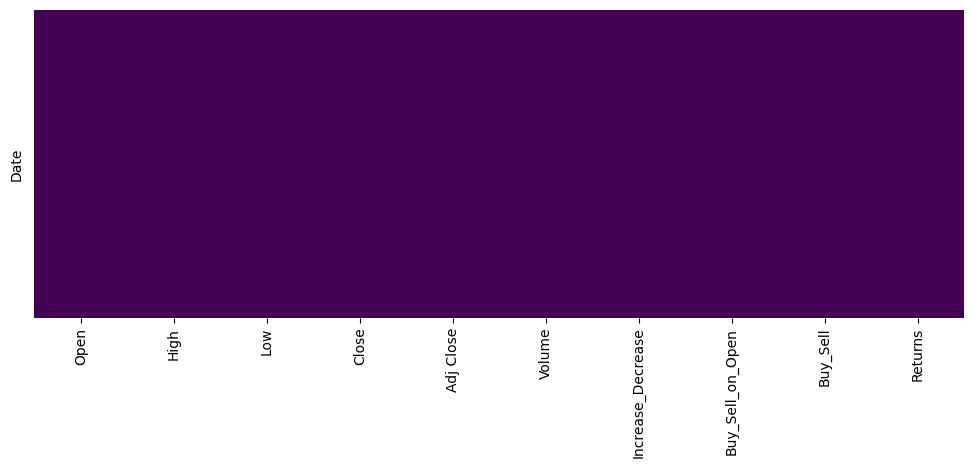

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [8]:
# see number of rows, number of columns
dataset.shape

(2897, 10)

In [9]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  28970


In [10]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [11]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2897 entries, 2010-06-30 to 2021-12-30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2897 non-null   float64
 1   High               2897 non-null   float64
 2   Low                2897 non-null   float64
 3   Close              2897 non-null   float64
 4   Adj Close          2897 non-null   float64
 5   Volume             2897 non-null   int64  
 6   Increase_Decrease  2897 non-null   int32  
 7   Buy_Sell_on_Open   2897 non-null   int32  
 8   Buy_Sell           2897 non-null   int32  
 9   Returns            2897 non-null   float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 215.0 KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

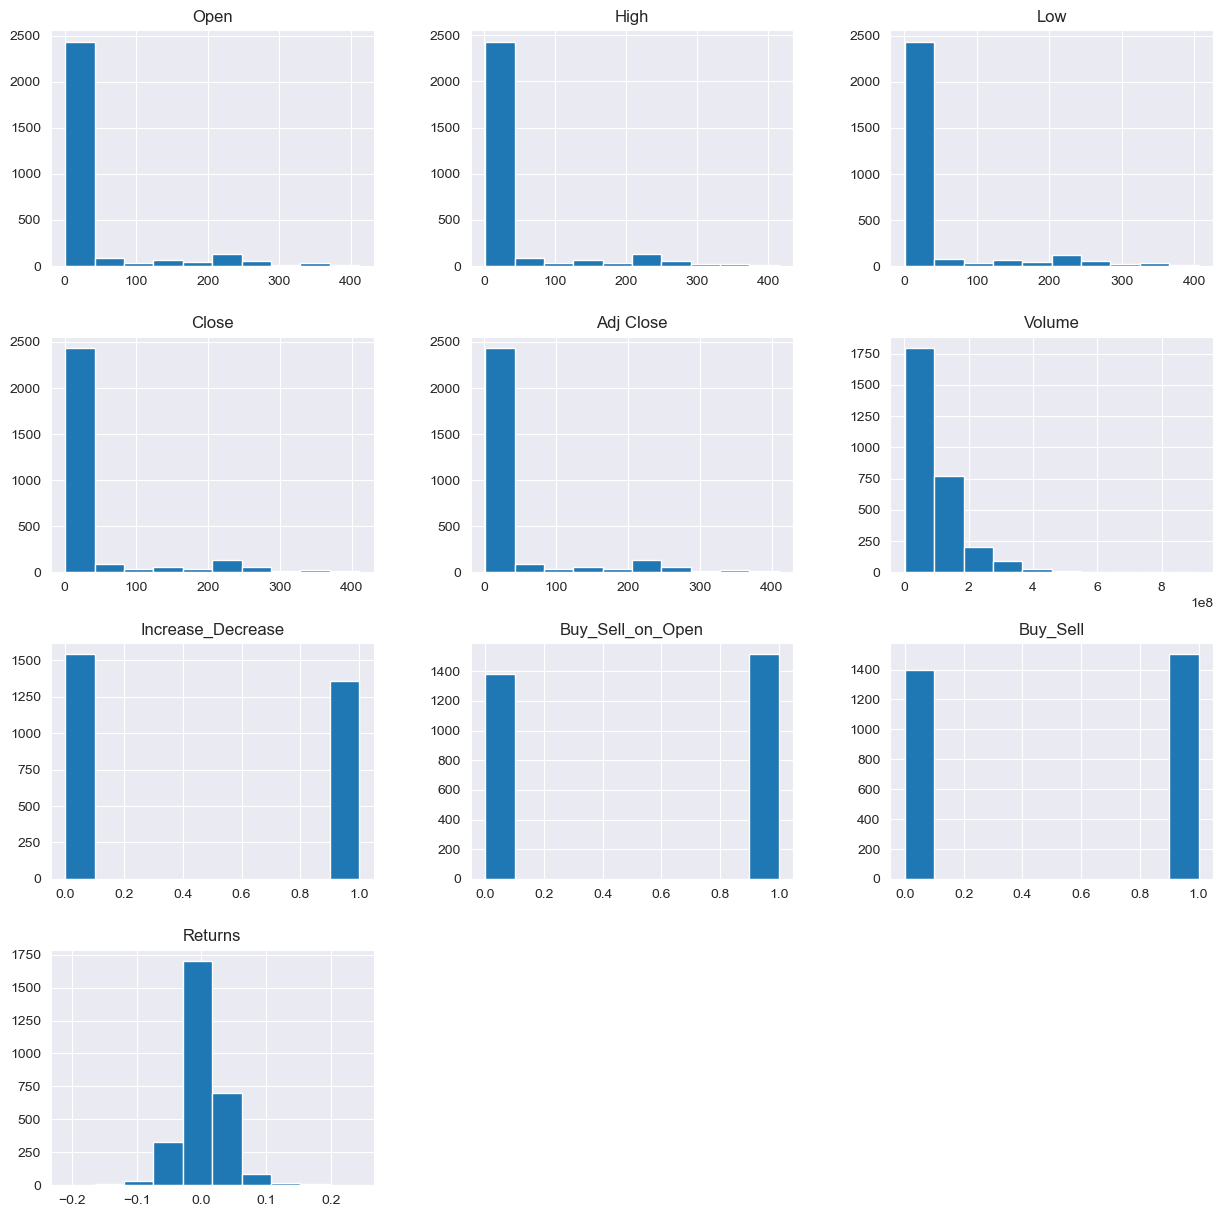

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

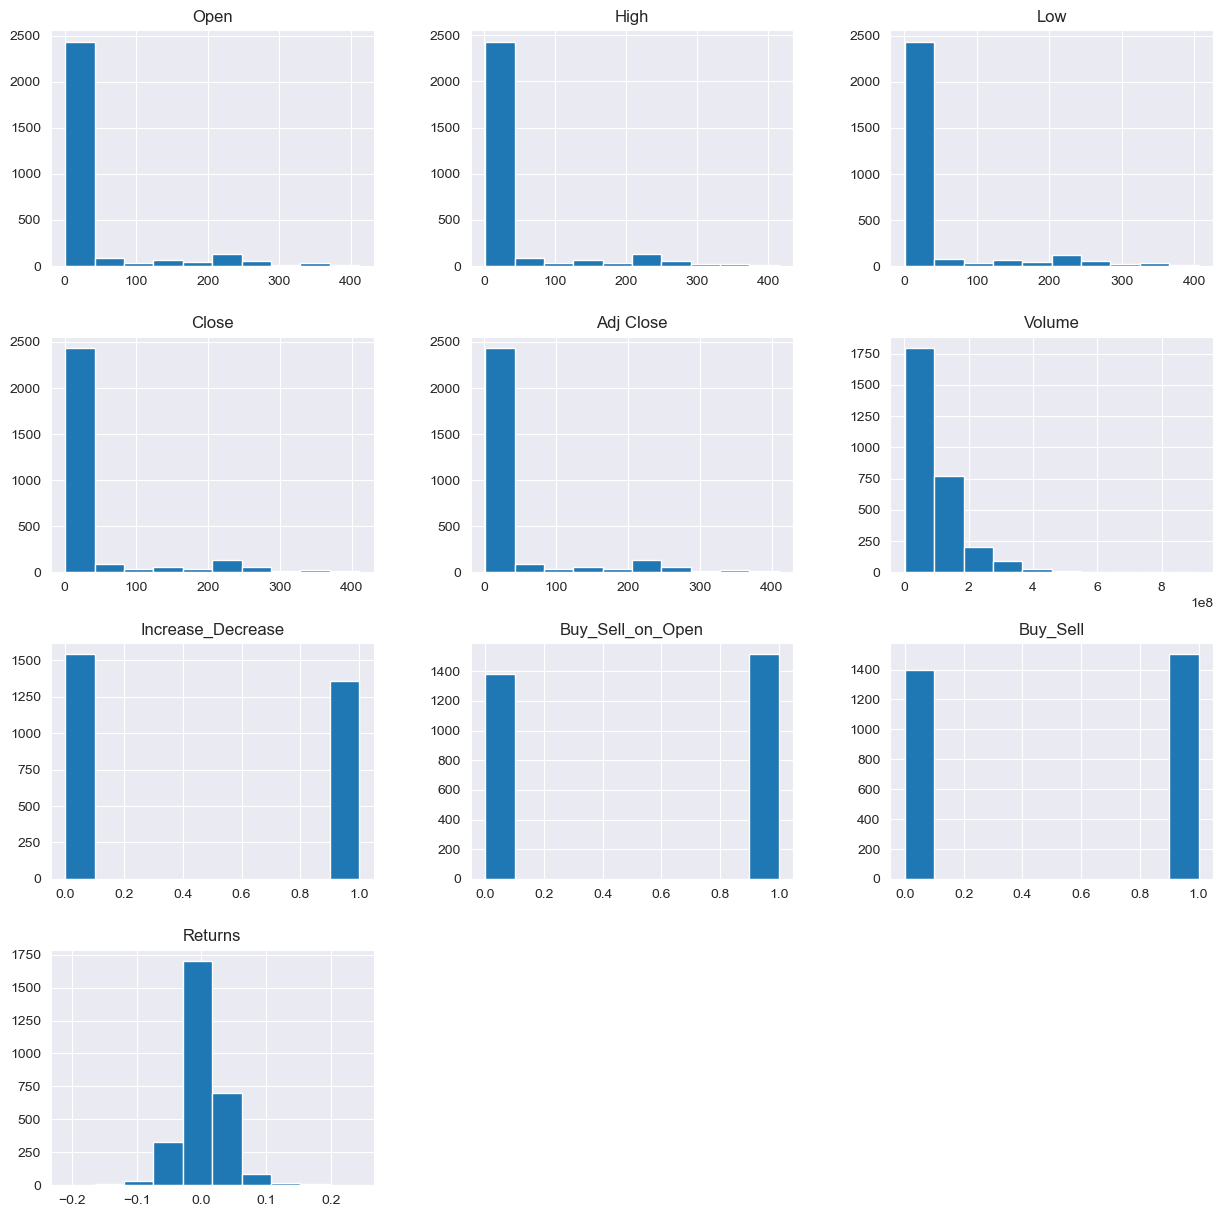

In [239]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [240]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000
mean,40.991990,41.864614,40.070170,41.026370,41.026370,9.412698e+07,0.468416,0.522610,0.518467,0.002492
std,75.216736,76.864317,73.460727,75.298005,75.298005,8.464854e+07,0.499088,0.499575,0.499745,0.035398
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,0.000000,0.000000,0.000000,-0.210628
25%,5.758000,6.064000,5.536667,5.839333,5.839333,3.852750e+07,0.000000,0.000000,0.000000,-0.014816
50%,15.381333,15.652000,15.140667,15.374000,15.374000,7.448250e+07,0.000000,1.000000,1.000000,0.001261
75%,22.210667,22.653999,21.816668,22.257999,22.257999,1.199796e+08,1.000000,1.000000,1.000000,0.019175
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,1.000000,1.000000,1.000000,0.243951


,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000
mean,40.991990,41.864614,40.070170,41.026370,41.026370,9.412698e+07,0.468416,0.522610,0.518467,0.002492
std,75.216736,76.864317,73.460727,75.298005,75.298005,8.464854e+07,0.499088,0.499575,0.499745,0.035398
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,0.000000,0.000000,0.000000,-0.210628
25%,5.758000,6.064000,5.536667,5.839333,5.839333,3.852750e+07,0.000000,0.000000,0.000000,-0.014816
50%,15.381333,15.652000,15.140667,15.374000,15.374000,7.448250e+07,0.000000,1.000000,1.000000,0.001261
75%,22.210667,22.653999,21.816668,22.257999,22.257999,1.199796e+08,1.000000,1.000000,1.000000,0.019175
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,1.000000,1.000000,1.000000,0.243951


# **Define X and Y**

In [241]:
X = dataset['Open'].values.reshape(-1,1)
y = dataset['Adj Close'].values.reshape(-1,1)

In [242]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

BayesianRidge(compute_score=True)

In [243]:
model.coef_

array([1.00042506])

array([1.00042506])

In [244]:
model.scores_

array([-15187.29585492,  -7020.34142468,  -7020.34141863])

array([-15187.29585492,  -7020.34142468,  -7020.34141863])

# **Split Train Data and Test Data**

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Dataset Traning and Model Traning**

In [247]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

BayesianRidge(compute_score=True)

In [248]:
model.coef_

array([1.00058705])

array([1.00058705])

In [249]:
model.scores_

array([-12150.70616924,  -5608.84993172,  -5608.84991968])

array([-12150.70616924,  -5608.84993172,  -5608.84991968])

# **Comparison of Actual Values and Predicted Values**

In [250]:
y_pred = model.predict(X_test)

# **Accuracy and Loss Function Values of the Model**

In [251]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean_Absolute_Error(MAE): 0.9434488336520307
Mean_Squared_Error(MSE): 7.605075516811632
Root_Mean_Squared_Error(RMSE): 2.757730138503699
Mean_Absolute_Error(MAE): 0.9434488336520307
Mean_Squared_Error(MSE): 7.605075516811632
Root_Mean_Squared_Error(RMSE): 2.757730138503699


In [252]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9986423631019721
Accuracy Score: 0.9986423631019721
